<a href="https://colab.research.google.com/github/ParthDave111/Quant-and-Finance-File/blob/main/Calibrating_Metron_and_Heston_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Callibration of Merton Model

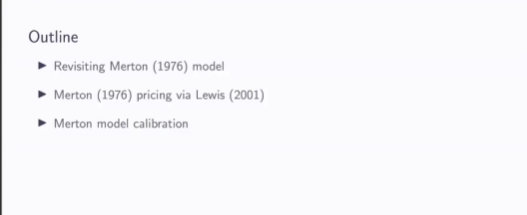

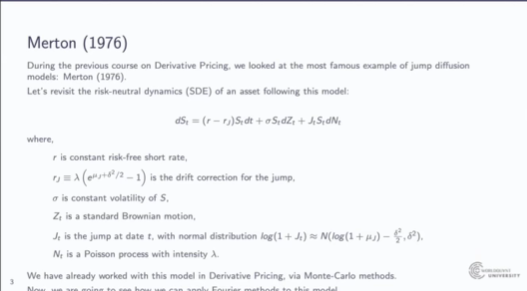

Equation for risk neutral with jump diffusion

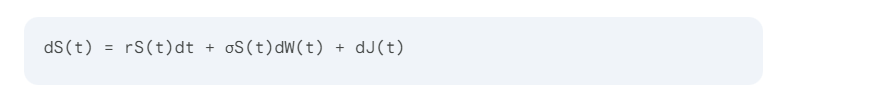

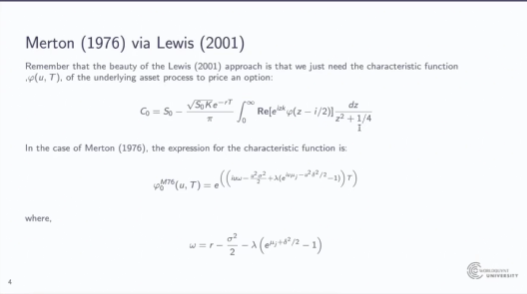

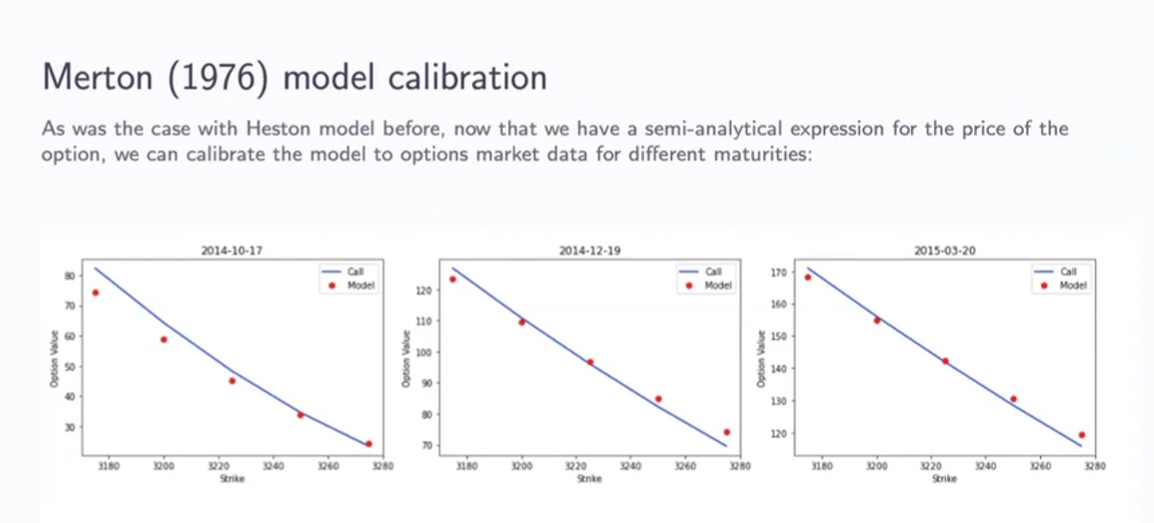

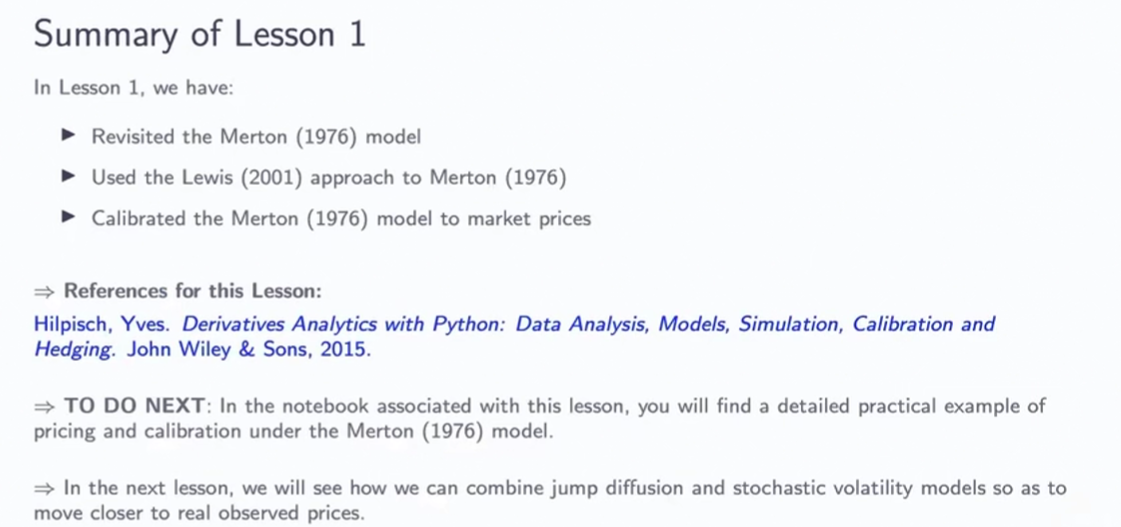

The Merton model, a structural model for credit risk, can be efficiently implemented using Lewis representation.

MERTON MODEL CALIBRATION

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

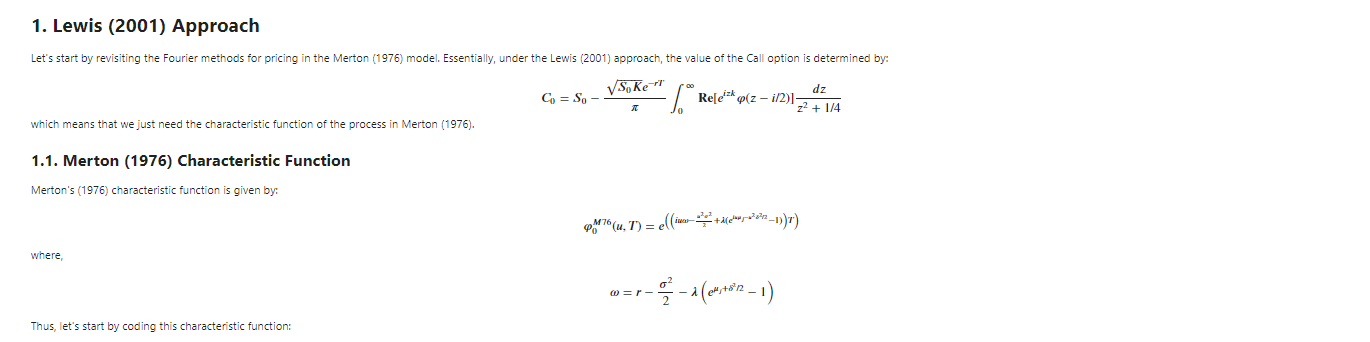

In [2]:
## coding characterisitic function

In [3]:
def M76_char_func(u, T, r, sigma, lamb, mu, delta):
    """
    Characteristic function for Merton '76 model
    """

    omega = r - 0.5 * sigma**2 - lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (
            1j * u * omega
            - 0.5 * u**2 * sigma**2
            + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1)
        )
        * T
    )
    return char_func_value

In [4]:
# define the value of integeral in Lewis (2001) using characteristic functiob

In [5]:
def M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta):
    """
    Integral function for Lewis (2001) under Merton'76 characteristic function
    """
    char_func = M76_char_func(u - 0.5 * 1j, T, r, sigma, lamb, mu, delta)

    value = 1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func).real

    return value

In [6]:
# value of call option

In [7]:
def M76_call_value(S0, K, T, r, sigma, lamb, mu, delta):
    """
    Value of the Call option under Lewis (2001) for Merton'76 jump diffusion model
    """

    int_value = quad(
        lambda u: M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta),
        0,
        50,
        limit=250,
    )[0]

    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)

    return call_value

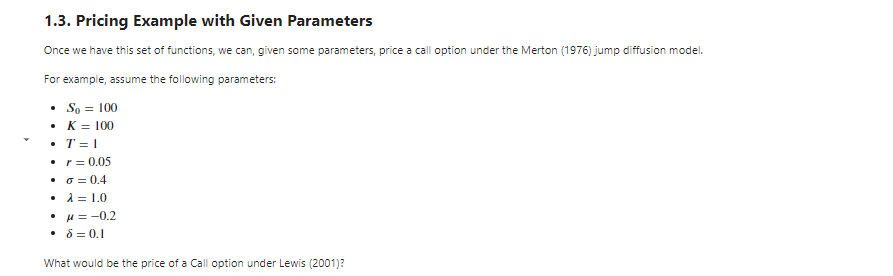

In [8]:
S0 = 100
K = 100
T = 1
r = 0.05
sigma = 0.4
lamb = 1
mu = -0.2
delta = 0.1

In [9]:
print(
    "Value of the Call option under Merton (1976) is:  $",
    M76_call_value(S0, K, T, r, sigma, lamb, mu, delta),
)

Value of the Call option under Merton (1976) is:  $ 19.947853881446505


Put option

In [74]:
def M76_put_value(S0, K, T, r, sigma, lamb, mu, delta):
    """
    Value of the Put option under Lewis (2001) for Merton'76 jump diffusion model
    """

    int_value = quad(
        lambda u: M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta),
        0,
        50,
        limit=250,
    )[0]


    # Use put-call parity to calculate put value
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    put_value = call_value - S0 + np.exp(-r * T) * K

    return put_value

In [72]:
S0 = 100
K = 100
T = 1
r = 0.05
sigma = 0.4
lamb = 1
mu = -0.2
delta = 0.1

In [73]:
print(

    M76_put_value(S0, K, T, r, sigma, lamb, mu, delta),
)

15.070796331517911


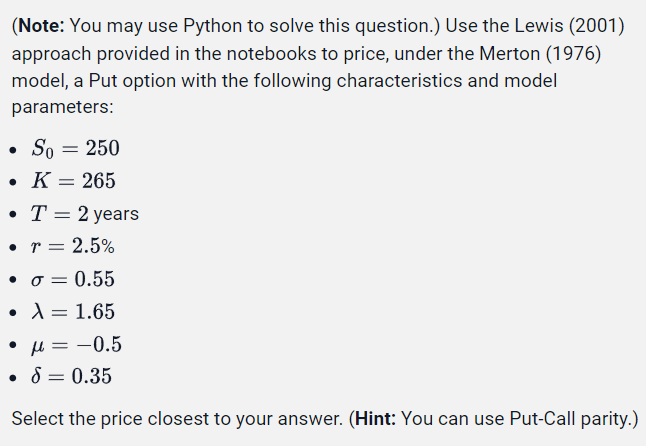

In [ ]:
S0 = 250
K = 265
T = 2
r = 0.025
sigma = 0.55
lamb = 1.65
mu = -0.5
delta = 0.35

In [75]:
print(

    M76_put_value(S0, K, T, r, sigma, lamb, mu, delta),
)

15.070796331517911


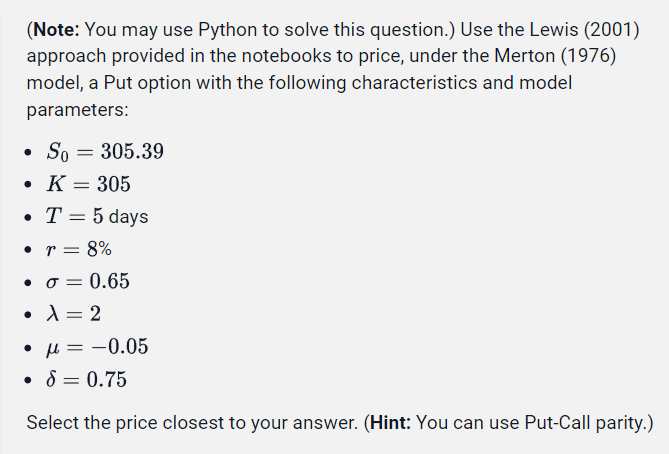

In [88]:
S0 = 305.39
K = 305
T = 5/365
r = 0.08
sigma = 0.65
lamb = 2
mu = -0.05
delta = 0.75

In [89]:
print(

    M76_put_value(S0, K, T, r, sigma, lamb, mu, delta),
)

11.49586287296421


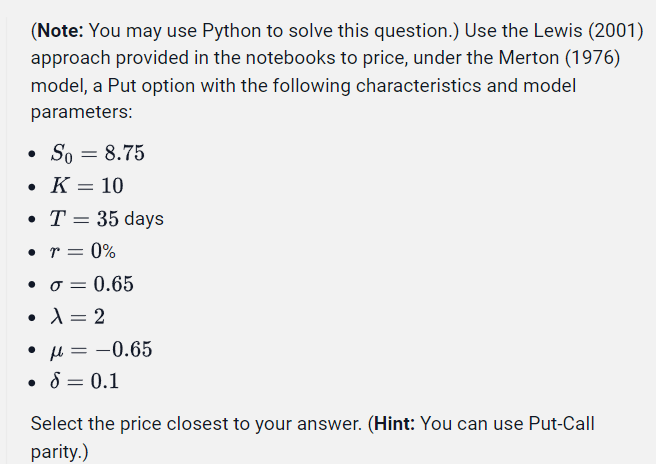

In [90]:
S0 = 8.75
K = 10
T = 35/365
r = 0
sigma = 0.65
lamb = 2
mu = -0.65
delta = 0.1

In [91]:
print(

    M76_put_value(S0, K, T, r, sigma, lamb, mu, delta),
)

1.7411184582820187


Merton (1976) Model Calibration

In [10]:
import pandas as pd
from scipy.optimize import brute, fmin

In [11]:
# Market Data from www.eurexchange.com
# as of September 30, 2014

h5 = pd.HDFStore(
    "option_data_M2.h5", "r"
)  # Place this file in the same directory before running the code
data = h5["data"]  # European call & put option data (3 maturities)
h5.close()
S0 = 3225.93  # EURO STOXX 50 level September 30, 2014

Learning :HDF Store is an interface provided by Pandas to store data objects in HDF5 files.

Here's a breakdown:

HDF5 stands for Hierarchical Data Format, a file format designed to store large and complex heterogeneous data.
Pandas HDFStore offers a dictionary-like interface for storing and retrieving pandas DataFrame and Series objects.
This interface can help with faster I/O operations when working with larger datasets.

In [14]:
# Option Selection

tol = 0.02  # Tolerance level to select ATM options (percent around ITM/OTM options)
options = data[(np.abs(data["Strike"] - S0) / S0) < tol]
options["Date"] = pd.DatetimeIndex(options["Date"])
options["Maturity"] = pd.DatetimeIndex(options["Maturity"])

<ipython-input-14-19431abf4ca8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  options["Date"] = pd.DatetimeIndex(options["Date"])
<ipython-input-14-19431abf4ca8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  options["Maturity"] = pd.DatetimeIndex(options["Maturity"])


In [15]:
# Adding Time-to-Maturity and constant short-rates

for row, option in options.iterrows():
    T = (option["Maturity"] - option["Date"]).days / 365.0
    options.loc[row, "T"] = T
    options.loc[row, "r"] = 0.005  # ECB base rate

<ipython-input-15-a628ea9d3c21>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  options.loc[row, "T"] = T
<ipython-input-15-a628ea9d3c21>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  options.loc[row, "r"] = 0.005  # ECB base rate


In [16]:
options.head()

,Date,Strike,Call,Maturity,Put,T,r
38,2014-09-30,3175.0,126.8,2014-12-19,78.8,0.219178,0.005
39,2014-09-30,3200.0,110.9,2014-12-19,87.9,0.219178,0.005
40,2014-09-30,3225.0,96.1,2014-12-19,98.1,0.219178,0.005
41,2014-09-30,3250.0,82.3,2014-12-19,109.3,0.219178,0.005
42,2014-09-30,3275.0,69.6,2014-12-19,121.6,0.219178,0.005


In [18]:
##  2.2. Defining Error Functions

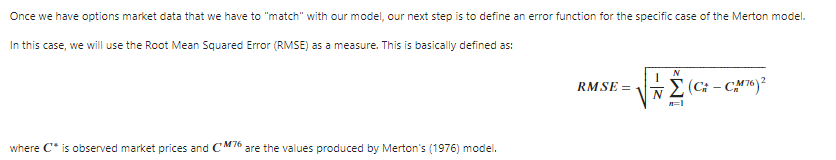

In [19]:
i = 0
min_RMSE = 100

In [20]:
def M76_error_function(p0):
    """
    Error function for parameter calibration in Merton'76 model
    ---------------
    Parameters to calibrate:
    sigma: float
          volatility factor in diffusion term
    lambda: float
          jump intensity
    mu: float
          expected jump size
    delta: float
          standard deviation of jump
    ----------------
    RMSE: Root Mean Squared Error
    """
    global i, min_RMSE
    sigma, lamb, mu, delta = p0

    if sigma < 0.0 or delta < 0.0 or lamb < 0.0:
        return 500.0
    se = []

    for row, option in options.iterrows():
        model_value = M76_call_value(
            S0, option["Strike"], option["T"], option["r"], sigma, lamb, mu, delta
        )
        se.append((model_value - option["Call"]) ** 2)

    RMSE = np.sqrt(sum(se) / len(se))
    min_RMSE = min(min_RMSE, RMSE)
    if i % 50 == 0:
        print("%4d |" % i, np.array(p0), "| %7.3f | %7.3f" % (RMSE, min_RMSE))
    i += 1
    return RMSE

callibration function

In [21]:
def M76_calibration_full():
    """
    Calibrates Merton (1976) stochastic volatility model to market quotes
    """
    # First run with brute force
    # (scan sensible regions, for faster convergence)
    p0 = brute(
        M76_error_function,
        (
            (0.075, 0.201, 0.025),  # sigma
            (0.10, 0.401, 0.1),  # lambda
            (-0.5, 0.01, 0.1),  # mu
            (0.10, 0.301, 0.1),
        ),  # delta
        finish=None,
    )

    # Second run with local, convex minimization
    # (we dig deeper where promising results)
    opt = fmin(
        M76_error_function, p0, xtol=0.0001, ftol=0.0001, maxiter=550, maxfun=1050
    )
    return opt

In [22]:
opt = M76_calibration_full()

   0 | [ 0.075  0.1   -0.5    0.1  ] |  31.540 |  31.540
  50 | [ 0.075  0.3   -0.1    0.3  ] |  22.852 |  11.298
 100 | [ 0.1  0.2 -0.2  0.2] |  19.922 |   8.654
 150 | [ 0.125  0.1   -0.3    0.1  ] |  10.704 |   5.571
 200 | [ 0.125  0.4   -0.5    0.3  ] |  55.500 |   4.662
 250 | [0.15 0.2  0.   0.2 ] |   6.619 |   3.586
 300 | [ 0.175  0.1   -0.1    0.1  ] |  14.171 |   3.586
 350 | [ 0.175  0.4   -0.3    0.3  ] |  54.376 |   3.586
 400 | [ 0.2  0.3 -0.4  0.2] |  63.380 |   3.586
 450 | [ 0.14702168  0.19533978 -0.10189428  0.10218084] |   3.495 |   3.428
 500 | [ 0.14987758  0.11503181 -0.14398098  0.09850597] |   3.401 |   3.401
 550 | [ 0.15597729  0.01124105 -0.20255149  0.07785796] |   3.359 |   3.359
 600 | [ 0.15617567  0.00947711 -0.20364524  0.07721602] |   3.358 |   3.358
Optimization terminated successfully.
         Current function value: 3.358419
         Iterations: 107
         Function evaluations: 183


Plotting the value

In [23]:
def generate_plot(opt, options):
    # First, we calculate model prices
    sigma, lamb, mu, delta = opt
    options["Model"] = 0.0
    for row, option in options.iterrows():
        options.loc[row, "Model"] = M76_call_value(
            S0, option["Strike"], option["T"], option["r"], sigma, lamb, mu, delta
        )

    # Second, we plot
    mats = sorted(set(options["Maturity"]))
    options = options.set_index("Strike")
    for i, mat in enumerate(mats):
        options[options["Maturity"] == mat][["Call", "Model"]].plot(
            style=["b-", "ro"], title="%s" % str(mat)[:10]
        )
        plt.ylabel("Option Value")

<ipython-input-23-23a3a2040d13>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  options["Model"] = 0.0


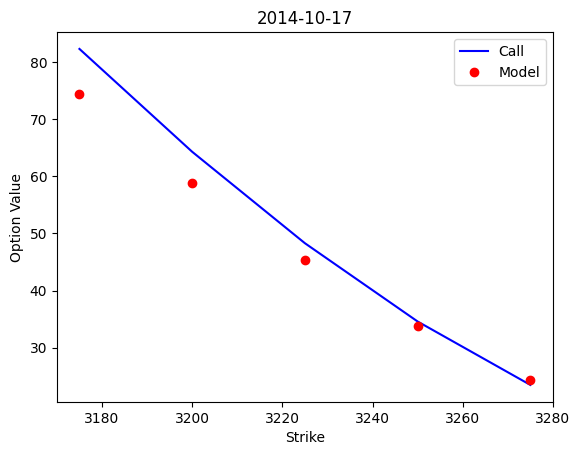

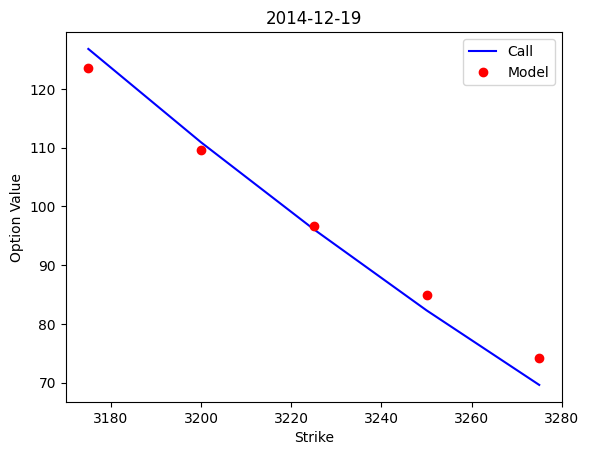

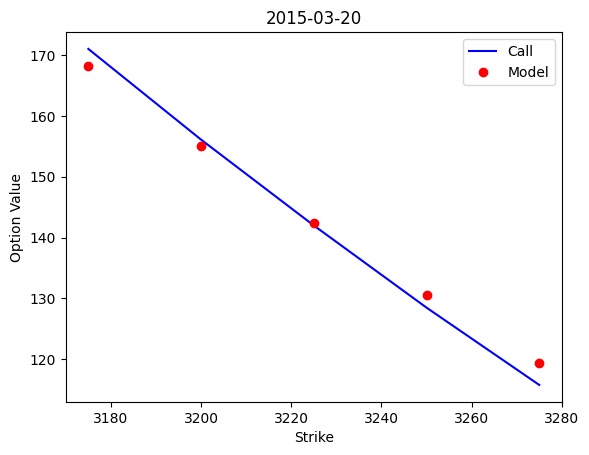

In [24]:
generate_plot(opt, options)

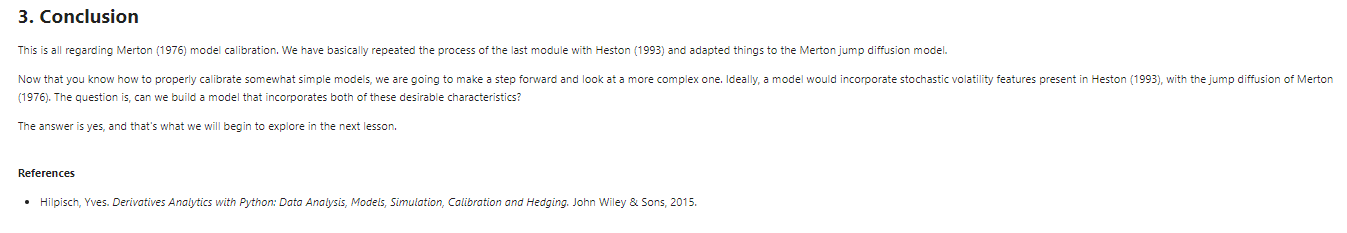

#COMBINING HESTON '93 AND MERTON '76

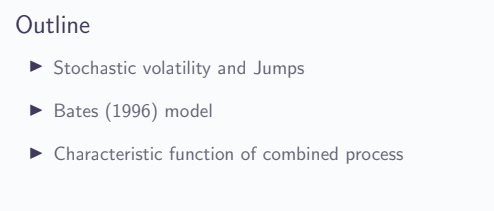

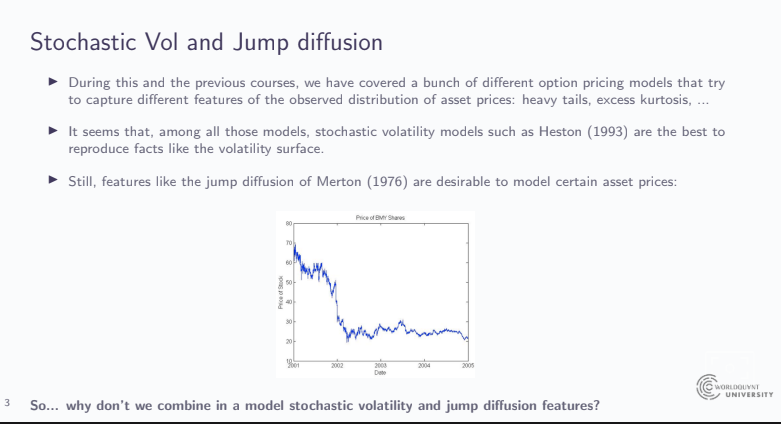

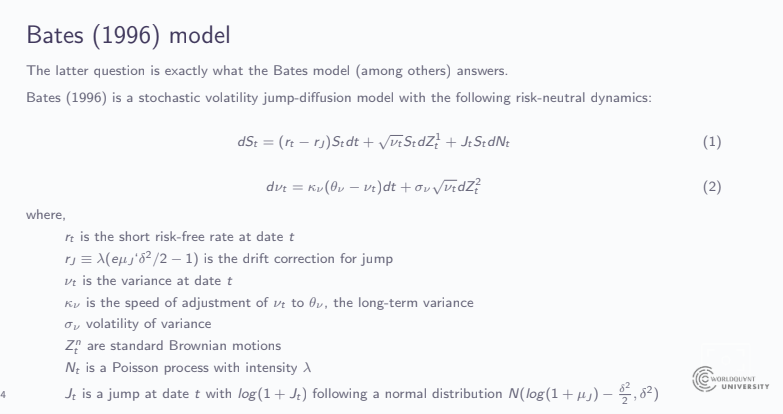

## Bates - combines heston and merton model


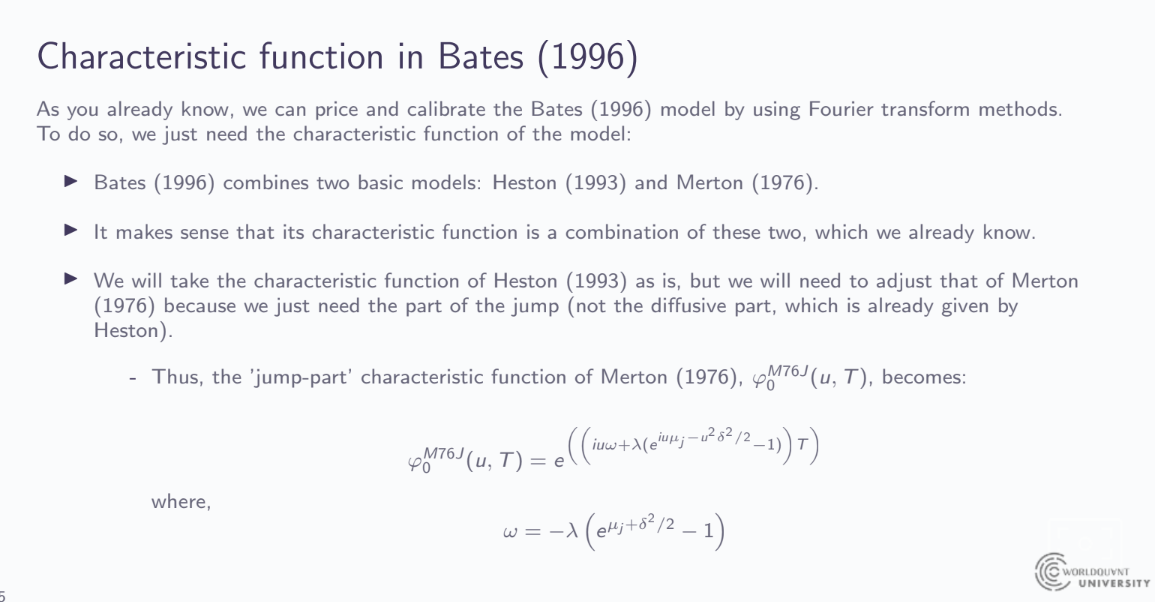

#Bates 1996

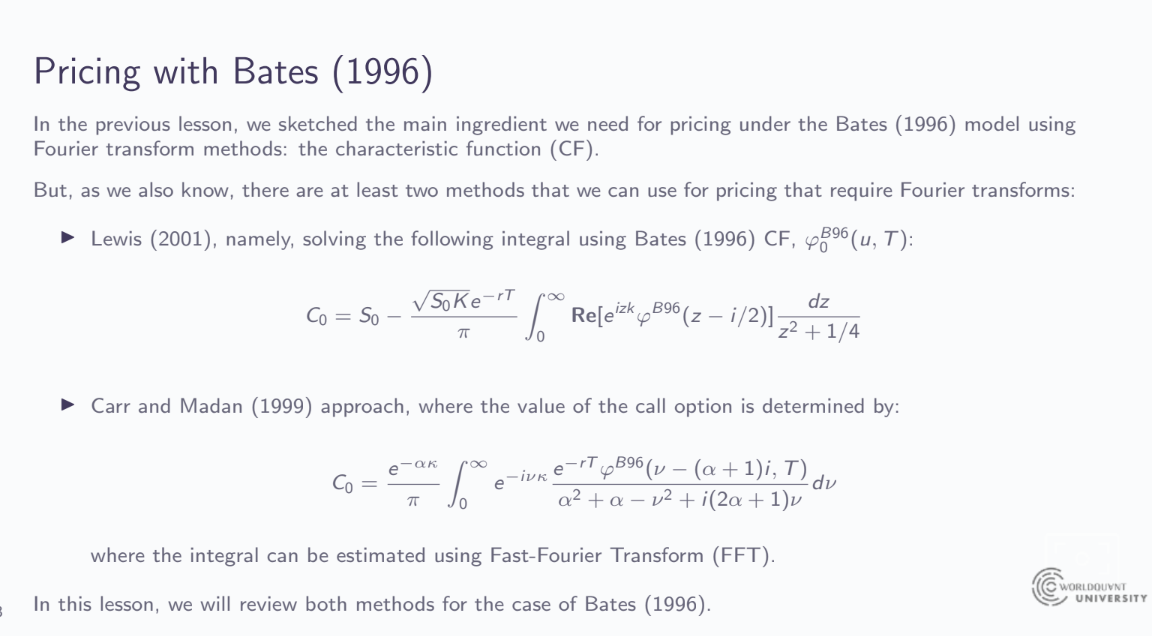

BATES (1996) IN PRACTICE

In [25]:
import numpy as np
from scipy.integrate import quad

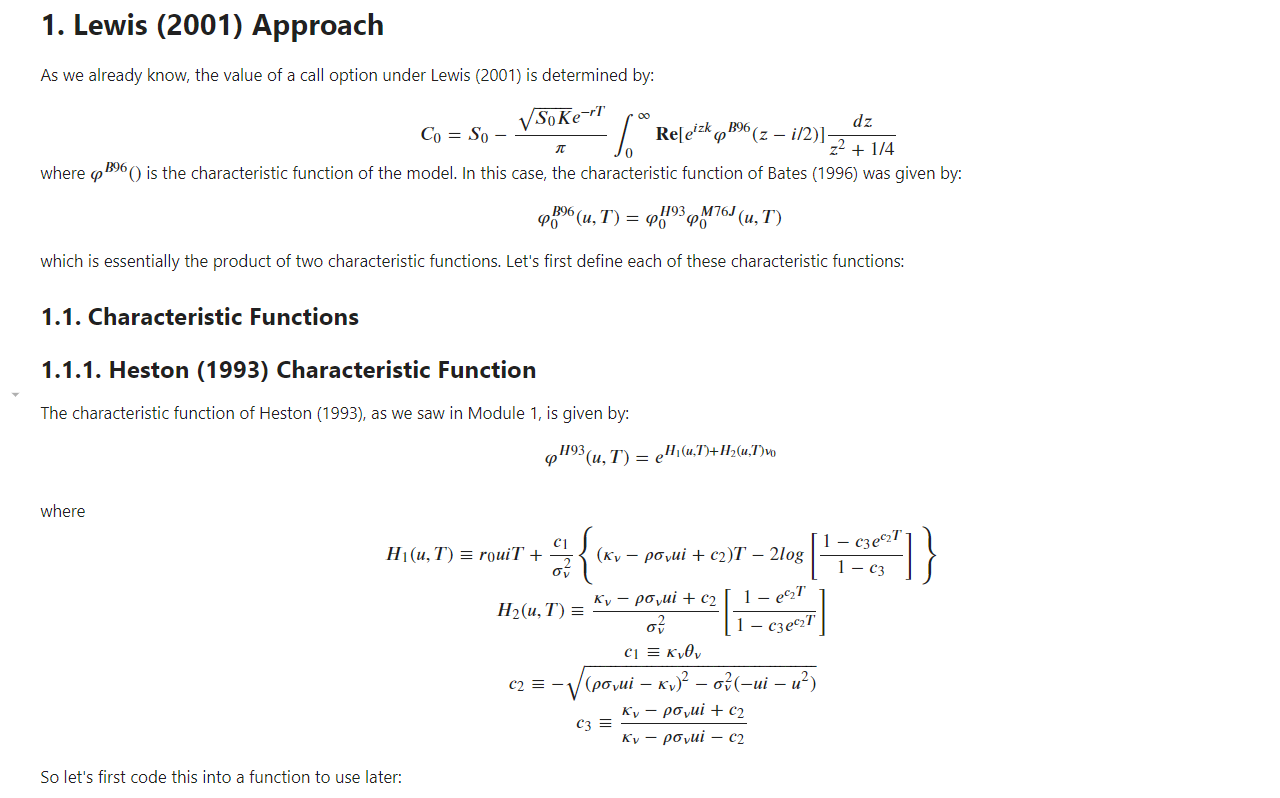

In [26]:
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function.
    Parameter definitions see function BCC_call_value."""
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

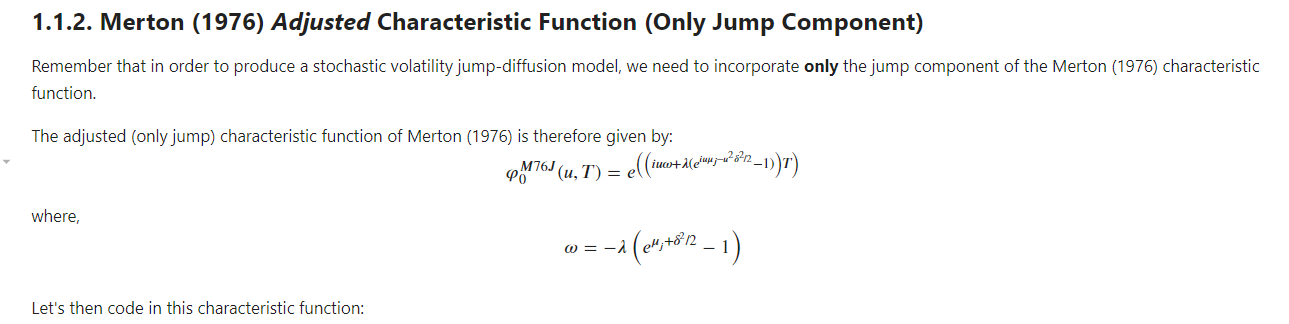

In [27]:
def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Characteristic function for Merton '76 model: Only jump component
    """

    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

In [28]:
def B96_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

1.2. Call and Integral Value in Bates (1996)

In [29]:
def B96_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Lewis (2001) integral value for Bates (1996) characteristic function
    """
    char_func_value = B96_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

In [30]:
def B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in B96 Model via Lewis (2001)
    Parameters:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance
    lamb: float
        jump intensity
    mu: float
        expected jump size
    delta: float
        standard deviation of jump
    ==========
    """
    int_value = quad(
        lambda u: B96_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

1.3. Pricing via Lewis (2001) with Bates (1996)

In [31]:
# General Parameters
S0 = 100
K = 100
T = 1
r = 0.05

# Heston'93 Parameters
kappa_v = 1.5
theta_v = 0.02
sigma_v = 0.15
rho = 0.1
v0 = 0.01

# Merton'76 Parameters
lamb = 0.25
mu = -0.2
delta = 0.1
sigma = np.sqrt(v0)

In [32]:
print(
    "B96 Call option price via Lewis(2001): $%10.4f"
    % B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
)

B96 Call option price via Lewis(2001): $    8.9047


# Put option calculation

In [67]:
def B96_put_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European put option in B96 Model via Lewis (2001)

    Parameters:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant
 risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance

    lamb: float
        jump intensity
    mu: float
        expected jump size
    delta: float
        standard deviation of jump
    ==========
    """

    int_value = quad(
        lambda u: B96_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        np.inf,
        limit=250,

    )[0]

    # Use put-call parity to calculate put value
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    put_value = call_value - S0 + np.exp(-r * T) * K

    return put_value

In [68]:
# General Parameters
S0 = 100
K = 100
T = 1
r = 0.05

# Heston'93 Parameters
kappa_v = 1.5
theta_v = 0.02
sigma_v = 0.15
rho = 0.1
v0 = 0.01

# Merton'76 Parameters
lamb = 0.25
mu = -0.2
delta = 0.1
sigma = np.sqrt(v0)

In [69]:
print(

    B96_put_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
)

4.027661313670222


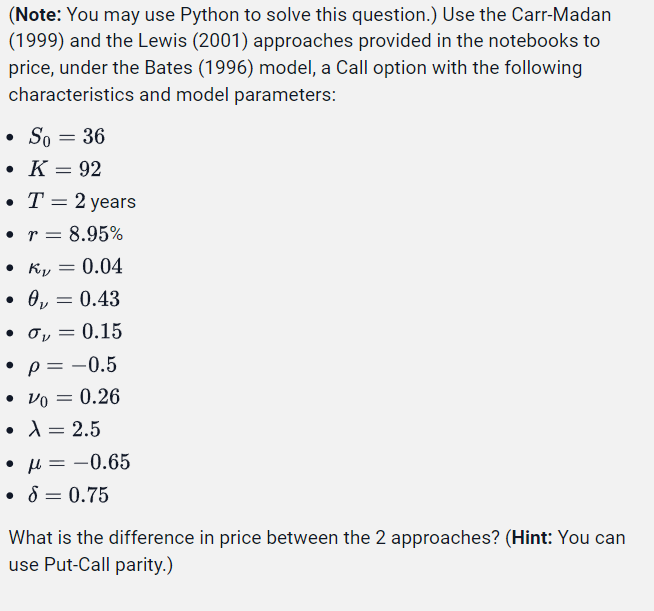

solution

In [76]:
# General Parameters
S0 = 36
K = 92
T = 2
r = 0.0895

# Heston'93 Parameters
kappa_v = 0.04
theta_v = 0.43
sigma_v = 0.15
rho = -0.5
v0 = 0.26

# Merton'76 Parameters
lamb = 2.5
mu = -0.65
delta = 0.75
sigma = np.sqrt(v0)

In [78]:
print(

    B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
)

16.74019282883021


In [81]:
# General Parameters
S0 = 36
K = 92
T = 2
r = 0.0895

# Heston'93 Parameters
kappa_v = 0.04
theta_v = 0.43
sigma_v = 0.15
rho = -0.5
v0 = 0.26

# Merton'76 Parameters
lamb = 2.5
mu = -0.65
delta = 0.75
sigma = np.sqrt(v0)

In [82]:
print(
    "B96 Call option price via FFT: $%10.4f"
    % B96_call_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
)

B96 Call option price via FFT: $   16.7385


In [83]:
car_madan =16.7385

In [84]:
lewis =16.7402

In [85]:
lewis - car_madan

0.0017000000000031434

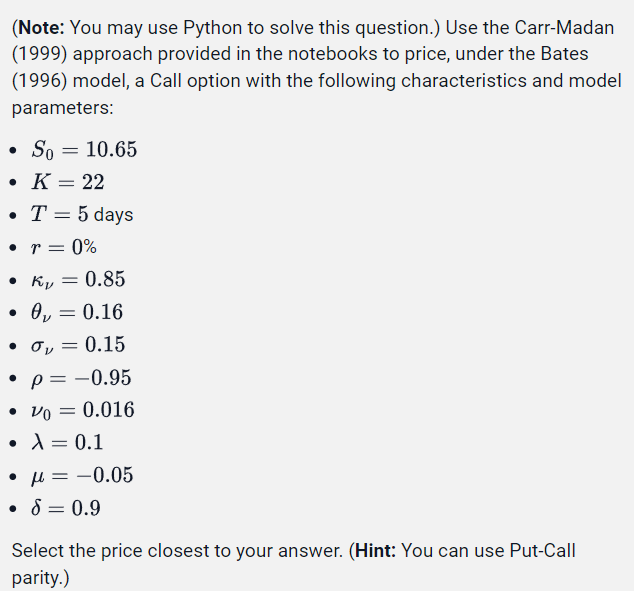

In [92]:
# General Parameters
S0 = 10.65
K = 22
T = 5/365
r = 0

# Heston'93 Parameters
kappa_v = 0.85
theta_v = 0.16
sigma_v = 0.15
rho = -0.95
v0 = 0.016

# Merton'76 Parameters
lamb = 0.1
mu = -0.05
delta = 0.9
sigma = np.sqrt(v0)

In [93]:
print(
    "B96 Call option price via FFT: $%10.4f"
    % B96_call_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
)

B96 Call option price via FFT: $    0.0049


In [94]:
print(

    B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
)

0.004859444553403591


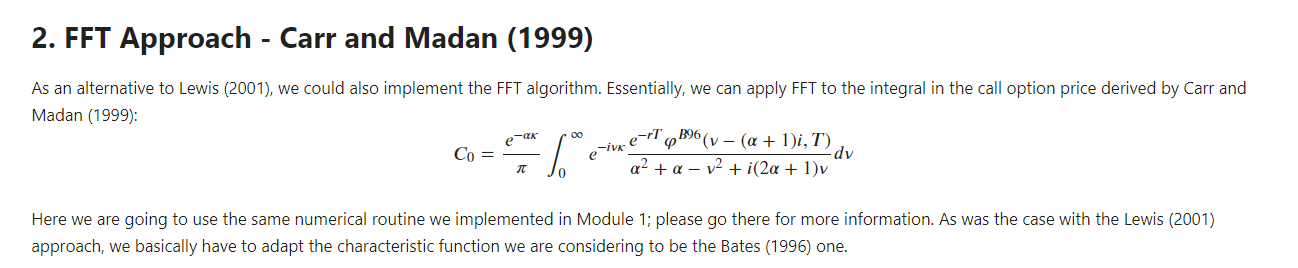

In [33]:
def B96_call_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Call option price in Bates (1996) under FFT
    """

    k = np.log(K / S0)
    g = 1  # Factor to increase accuracy
    N = g * 4096
    eps = (g * 150) ** -1
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    u = np.arange(1, N + 1, 1)
    vo = eta * (u - 1)

    # Modifications to ensure integrability
    if S0 >= 0.95 * K:  # ITM Case
        alpha = 1.5
        v = vo - (alpha + 1) * 1j
        modcharFunc = np.exp(-r * T) * (
            B96_char_func(v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
            / (alpha**2 + alpha - vo**2 + 1j * (2 * alpha + 1) * vo)
        )

    else:
        alpha = 1.1
        v = (vo - 1j * alpha) - 1j
        modcharFunc1 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo - 1j * alpha))
            - np.exp(r * T) / (1j * (vo - 1j * alpha))
            - B96_char_func(
                v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo - 1j * alpha) ** 2 - 1j * (vo - 1j * alpha))
        )

        v = (vo + 1j * alpha) - 1j

        modcharFunc2 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo + 1j * alpha))
            - np.exp(r * T) / (1j * (vo + 1j * alpha))
            - B96_char_func(
                v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo + 1j * alpha) ** 2 - 1j * (vo + 1j * alpha))
        )

    # Numerical FFT Routine
    delt = np.zeros(N)
    delt[0] = 1
    j = np.arange(1, N + 1, 1)
    SimpsonW = (3 + (-1) ** j - delt) / 3
    if S0 >= 0.95 * K:
        FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta * SimpsonW
        payoff = (np.fft.fft(FFTFunc)).real
        CallValueM = np.exp(-alpha * k) / np.pi * payoff
    else:
        FFTFunc = (
            np.exp(1j * b * vo) * (modcharFunc1 - modcharFunc2) * 0.5 * eta * SimpsonW
        )
        payoff = (np.fft.fft(FFTFunc)).real
        CallValueM = payoff / (np.sinh(alpha * k) * np.pi)

    pos = int((k + b) / eps)
    CallValue = CallValueM[pos] * S0

    return CallValue

In [34]:
print(
    "B96 Call option price via FFT: $%10.4f"
    % B96_call_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
)

B96 Call option price via FFT: $    8.9047


In this lesson, we have applied both Fourier-based techniques learned in Module 1--Lewis (2001) and Carr and Madan (1999) FFT procedure--to the stochastic volatility jump-diffusion model of Bates (1996). As you can see, once we are familiar with Fourier pricing methods, it is just a matter of adapting the code to the characteristic function of the underlying asset process.

We still have not touched upon the most important issue, though: model calibration. That's what we will do in the next lesson.

# calibrating the bates 1996 model

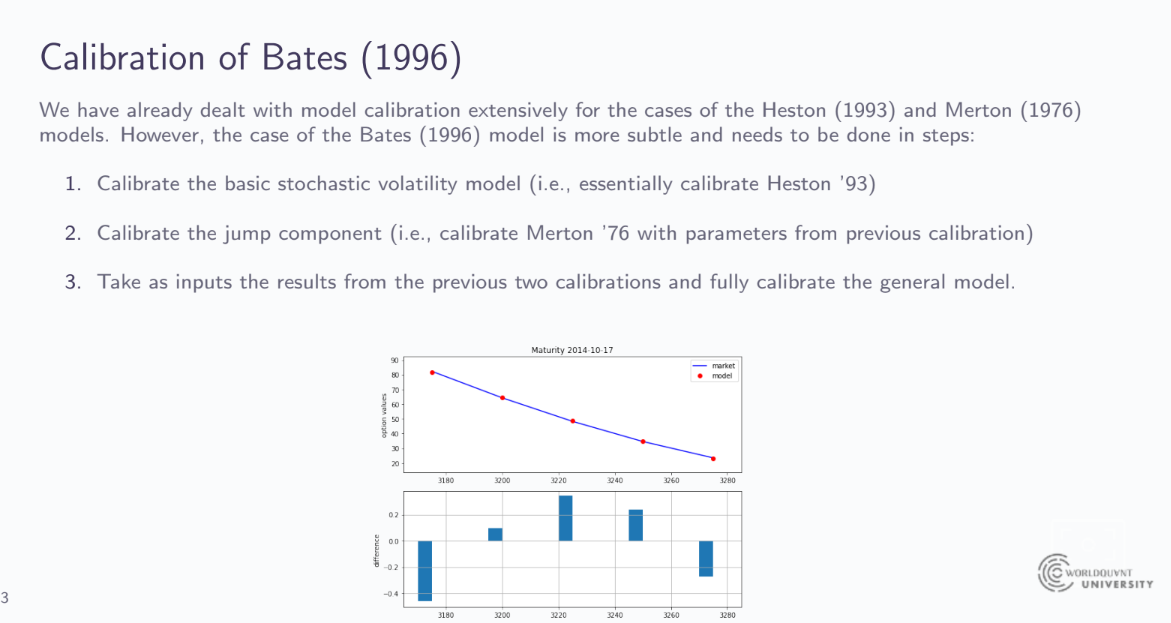

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
from scipy.optimize import brute, fmin

1. Calibrate Heston (1993) stochastic volatility model
We already know that Bates (1996) model combines two desirable features: stochastic volatility of Heston (1993) and jump component from Merton (1976). Thus, as we know, the characteristic function,  𝜑𝐵96()
 , of Bates (1996) is given by:

 𝜑𝐵960(𝑢,𝑇)=𝜑𝐻930𝜑𝑀76𝐽0(𝑢,𝑇)



As we also know,  𝜑𝐻930
  stands for the characteristic function of Heston (1993). Thus, our first task in calibrating the Bates (1996) model will be to calibrate Heston (1993) model to observed market data. This is actually something we have already done before in Module 1 of the Stochastic Modeling course. Please, go there to revisit the calibration of Heston (1993) model to market prices of EuroStoxx 50 options.


At this point, we assume that you know how to do the Heston calibration, so we will take advantage of the opportunity to introduce a python file format that some of you may be already familiar with, but that will come in handy in your data handling tasks: .npy

This is basically a Numpy format, you can check more about it here: https://numpy.org/devdocs/reference/generated/numpy.lib.format.html

Now, the good thing about this file formatting is that it is extremely fast to read and load by python, so it can saves us a ton of time when we work with large numerical data sets. You can read more about its speed here: https://www.kdnuggets.com/2018/04/start-using-npy-files-more-often.html


So, suppose that we have performed the calibration of Heston (1993) model and we have saved the parameters from stochastic volatility model in a .npy file using the np.save( ) feature. We can simply load those parameters from the file (opt_sv.npy) now in order to perform our next task:

In [36]:
kappa_v, theta_v, sigma_v, rho, v0 = np.load("opt_sv_M2.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'opt_sv_M2.npy'

In [37]:
# Getting options market data


In [38]:
# Option market data loading
h5 = pd.HDFStore("option_data_M2.h5", "r")
data = h5["data"]  # European call & put option data (3 maturities)
h5.close()
S0 = 3225.93  # EURO STOXX 50 level 30.09.2014

In [39]:
# Set tolerance level for near ATM options
tol = 0.02  # percent ITM/OTM options
options = data[(np.abs(data["Strike"] - S0) / S0) < tol]
options["Date"] = pd.DatetimeIndex(options["Date"])
options["Maturity"] = pd.DatetimeIndex(options["Maturity"])

<ipython-input-39-dd8aa1d42d69>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  options["Date"] = pd.DatetimeIndex(options["Date"])
<ipython-input-39-dd8aa1d42d69>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  options["Maturity"] = pd.DatetimeIndex(options["Maturity"])


In [40]:
# Adding Time-to-Maturity and constant short-rates
for row, option in options.iterrows():
    T = (option["Maturity"] - option["Date"]).days / 365.0
    options.loc[row, "T"] = T
    options.loc[row, "r"] = 0.02

<ipython-input-40-2ad417446a1a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  options.loc[row, "T"] = T
<ipython-input-40-2ad417446a1a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  options.loc[row, "r"] = 0.02


In [41]:
# Select closest maturity
mats = sorted(set(options["Maturity"]))
options = options[options["Maturity"] == mats[0]]

In [42]:
time_to_mat = options["Maturity"].iloc[0] - options["Date"].iloc[0]
time_to_mat

Timedelta('17 days 00:00:00')

In [43]:
options.head(5)

,Date,Strike,Call,Maturity,Put,T,r
456,2014-09-30,3175.0,82.3,2014-10-17,24.5,0.046575,0.02
457,2014-09-30,3200.0,64.3,2014-10-17,31.5,0.046575,0.02
458,2014-09-30,3225.0,48.3,2014-10-17,40.5,0.046575,0.02
459,2014-09-30,3250.0,34.6,2014-10-17,51.8,0.046575,0.02
460,2014-09-30,3275.0,23.5,2014-10-17,65.8,0.046575,0.02


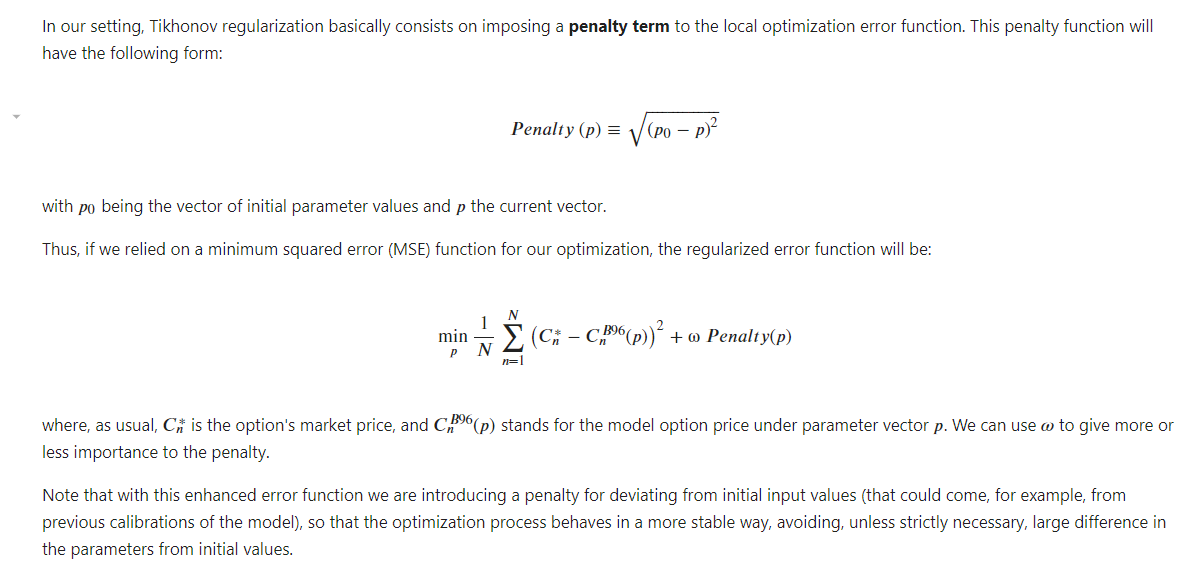

In [44]:
i = 0
min_MSE = 5000.0
local_opt = False

In [45]:
def B96_error_function(p0):
    """
    Error function for Bates (1996) model

    Parameters:
    -------------
    lamb: float
        jump intensity
    mu: float
        expected jump size
    delta: float
        standard deviation of jump
    Returns
    -------------
    MSE: float
        mean squared error
    """

    global i, min_MSE, local_opt, opt1
    lamb, mu, delta = p0
    if lamb < 0.0 or mu < -0.6 or mu > 0.0 or delta < 0.0:
        return 5000.0
    se = []
    for row, option in options.iterrows():
        model_value = B96_call_value(
            S0,
            option["Strike"],
            option["T"],
            option["r"],
            kappa_v,
            theta_v,
            sigma_v,
            rho,
            v0,
            lamb,
            mu,
            delta,
        )
        se.append((model_value - option["Call"]) ** 2)
    MSE = sum(se) / len(se)
    min_MSE = min(min_MSE, MSE)
    if i % 25 == 0:
        print("%4d |" % i, np.array(p0), "| %7.3f | %7.3f" % (MSE, min_MSE))
    i += 1
    if local_opt:
        penalty = np.sqrt(np.sum((p0 - opt1) ** 2)) * 1
        return MSE + penalty
    return MSE

In [46]:
def B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in B96 Model via Lewis (2001)
    Parameters:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance
    lamb: float
        jump intensity
    mu: float
        expected jump size
    delta: float
        standard deviation of jump
    ==========
    """
    int_value = quad(
        lambda u: B96_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

In [47]:
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function.
    Parameter definitions see function BCC_call_value."""
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

In [48]:
def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Characteristic function for Merton '76 model: Only jump component
    """

    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

In [49]:
def B96_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

In [50]:
def B96_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Lewis (2001) integral value for Bates (1996) characteristic function
    """
    char_func_value = B96_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value


In [51]:
def B96_calibration_short():
    """
    Calibrates jump component of Bates (1996) model to market prices
    """
    # First, we run with brute force
    # (scan sensible regions)
    opt1 = 0.0
    opt1 = brute(
        B96_error_function,
        (
            (0.0, 0.51, 0.1),  # lambda
            (-0.5, -0.11, 0.1),  # mu
            (0.0, 0.51, 0.25),
        ),  # delta
        finish=None,
    )

    # Second, we run with local, convex minimization
    # (dig deeper where promising)
    opt2 = fmin(
        B96_error_function,
        opt1,
        xtol=0.0000001,
        ftol=0.0000001,
        maxiter=550,
        maxfun=750,
    )
    return opt2

In [52]:
params = B96_calibration_short()

   0 | [ 0.  -0.5  0. ] | 298.474 | 298.474
  25 | [ 0.2  -0.5   0.25] | 125.327 | 119.481
  50 | [ 0.4 -0.5  0.5] |  15.838 |  15.838
  75 | [ 0.5   -0.5    0.525] |   1.890 |   1.890
 100 | [ 0.49282407 -0.41908436  0.60981653] |   0.612 |   0.603
 125 | [ 0.51154637 -0.40455005  0.58115613] |   0.597 |   0.597
 150 | [ 0.55975804 -0.34994062  0.52585492] |   0.589 |   0.589
 175 | [ 0.61302327 -0.30718088  0.47732205] |   0.577 |   0.577
 200 | [ 0.67338286 -0.26602194  0.43098986] |   0.579 |   0.568
 225 | [ 0.70948119 -0.25311636  0.40942561] |   0.557 |   0.557
 250 | [ 0.80413325 -0.21188868  0.36090787] |   0.540 |   0.540
 275 | [ 0.91051159 -0.18102518  0.31654688] |   0.526 |   0.524
 300 | [ 0.95959667 -0.17403341  0.29973561] |   0.512 |   0.512
 325 | [ 1.05074246 -0.1550556   0.27199503] |   0.512 |   0.503
 350 | [ 1.16270936 -0.13496362  0.24983956] |   0.481 |   0.481
 375 | [ 1.18299268 -0.13486017  0.24534851] |   0.469 |   0.469
 400 | [ 1.30298252 -0.12203139  0.

<ipython-input-51-9b5b5c0b4934>:20: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  opt2 = fmin(


In [53]:
params

array([ 8.38711204, -0.03777857,  0.03599179])

In [54]:
lamb = 0
mu = -0.5
delta = 0

#Model vs market price after jump calibration

In [55]:
def B96_jump_calculate_model_values(p0):
    """Calculates all model values given parameter vector p0."""
    lamb, mu, delta = p0
    values = []
    for row, option in options.iterrows():
        T = (option["Maturity"] - option["Date"]).days / 365.0
        r = 0.02
        model_value = B96_call_value(
            S0,
            option["Strike"],
            T,
            r,
            kappa_v,
            theta_v,
            sigma_v,
            rho,
            v0,
            lamb,
            mu,
            delta,
        )
        values.append(model_value)
    return np.array(values)

In [56]:
def plot_calibration_results(p0):
    options["Model"] = B96_jump_calculate_model_values(p0)
    plt.figure(figsize=(8, 6))
    plt.subplot(211)
    plt.grid()
    plt.title("Maturity %s" % str(options["Maturity"].iloc[0])[:10])
    plt.ylabel("option values")
    plt.plot(options.Strike, options.Call, "b", label="market")
    plt.plot(options.Strike, options.Model, "ro", label="model")
    plt.legend(loc=0)
    plt.axis(
        [
            min(options.Strike) - 10,
            max(options.Strike) + 10,
            min(options.Call) - 10,
            max(options.Call) + 10,
        ]
    )
    plt.subplot(212)
    plt.grid()
    wi = 5.0
    diffs = options.Model.values - options.Call.values
    plt.bar(options.Strike.values - wi / 2, diffs, width=wi)
    plt.ylabel("difference")
    plt.axis(
        [
            min(options.Strike) - 10,
            max(options.Strike) + 10,
            min(diffs) * 1.1,
            max(diffs) * 1.1,
        ]
    )
    plt.tight_layout()

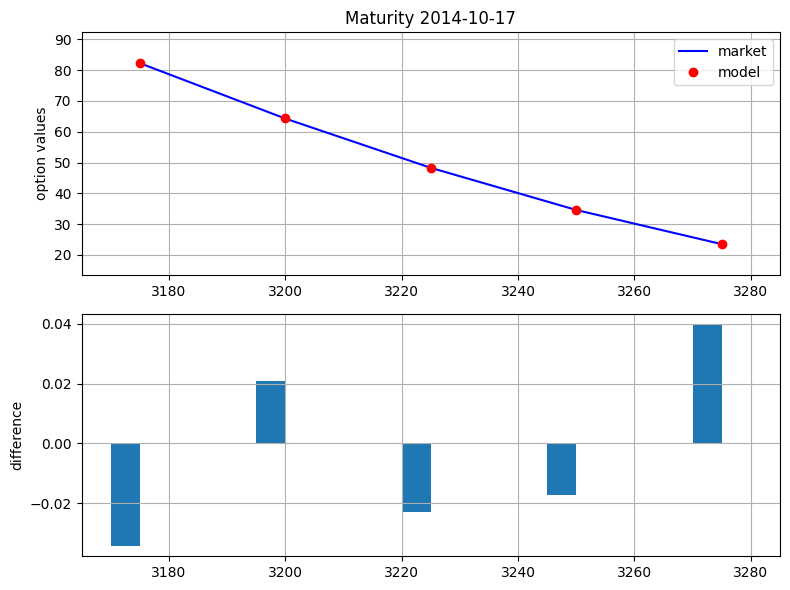

In [57]:
plot_calibration_results(params)

Full Bates (1996) model calibration

In [58]:
p0 = [kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta]

In [59]:
i = 0
min_MSE = 5000.0


def B96_full_error_function(p0):
    global i, min_MSE
    kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta = p0

    if (
        kappa_v < 0.0
        or theta_v < 0.005
        or sigma_v < 0.0
        or rho < -1.0
        or rho > 1.0
        or v0 < 0.0
        or lamb < 0.0
        or mu < -0.6
        or mu > 0.0
        or delta < 0.0
    ):
        return 5000.0

    if 2 * kappa_v * theta_v < sigma_v**2:
        return 5000.0

    se = []
    for row, option in options.iterrows():
        model_value = B96_call_value(
            S0,
            option["Strike"],
            option["T"],
            option["r"],
            kappa_v,
            theta_v,
            sigma_v,
            rho,
            v0,
            lamb,
            mu,
            delta,
        )
        se.append((model_value - option["Call"]) ** 2)

    MSE = sum(se) / len(se)
    min_MSE = min(min_MSE, MSE)
    if i % 25 == 0:
        print("%4d |" % i, np.array(p0), "| %7.3f | %7.3f" % (MSE, min_MSE))
    i += 1
    return MSE

In [60]:
def B96_calibration_full():
    opt = fmin(
        B96_full_error_function, p0, xtol=0.001, ftol=0.001, maxiter=1250, maxfun=650
    )
    return opt

In [61]:
def B96_calculate_model_values(p0):
    kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta = p0
    values = []
    for row, option in options.iterrows():
        model_value = B96_call_value(
            S0,
            option["Strike"],
            option["T"],
            option["r"],
            kappa_v,
            theta_v,
            sigma_v,
            rho,
            v0,
            lamb,
            mu,
            delta,
        )

        values.append(model_value)

    return np.array(values)

Full model calibration parameters

In [62]:
full_params = B96_calibration_full()

   0 | [ 1.5   0.02  0.15  0.1   0.01  0.   -0.5   0.  ] | 298.474 | 298.474
  25 | [ 1.53908398e+00  1.96077143e-02  1.44026421e-01  9.68428908e-02
  1.11020463e-02  9.35797818e-05 -4.94575301e-01  6.87751607e-05] | 256.858 | 254.568
  50 | [ 1.28320464e+00  2.14760470e-02  8.94042239e-02  6.29465666e-02
  1.65973378e-02  4.10948106e-04 -5.68873416e-01  9.99169033e-04] | 107.707 |  93.234
  75 | [ 1.07774127  0.02408547  0.02106604  0.0364363   0.0216542   0.00124461
 -0.58545299  0.0020775 ] |  35.926 |  22.446
 100 | [ 0.89823677  0.02504818  0.00447868  0.02917034  0.02416786  0.00168071
 -0.57528373  0.00245339] |  18.013 |  17.255
 125 | [ 0.66476926  0.02729232  0.01026864  0.02593868  0.02713823  0.00268739
 -0.49318334  0.00277602] |   8.962 |   8.587
 150 | [ 0.51875928  0.02811533  0.01244969  0.02285537  0.02827778  0.00301774
 -0.46718774  0.00293152] |   8.677 |   8.587
 175 | [ 0.59016597  0.02825526  0.00934601  0.02014086  0.02792471  0.00302468
 -0.46459142  0.0029589

<ipython-input-46-e06401f36e4a>:32: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  int_value = quad(


 275 | [ 6.73667301e-01  2.92734576e-02  1.69613718e-05  1.24356808e-02
  2.78783262e-02  3.27906094e-03 -4.43131411e-01  3.12448821e-03] |   8.576 |   8.576


<ipython-input-46-e06401f36e4a>:32: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  int_value = quad(
<ipython-input-46-e06401f36e4a>:32: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  int_value = quad(


 300 | [ 6.77872827e-01  2.92490701e-02  1.41643585e-05  1.26536174e-02
  2.78682451e-02  3.27467356e-03 -4.43604181e-01  3.11942456e-03] |   8.576 |   8.576


<ipython-input-46-e06401f36e4a>:32: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  int_value = quad(


 325 | [ 7.23259430e-01  2.91408609e-02  1.18549077e-04  1.34892544e-02
  2.78749022e-02  3.29649039e-03 -4.42103249e-01  3.10277562e-03] |   8.575 |   8.575
 350 | [ 1.04067576e+00  2.83097233e-02  9.11267701e-04  1.98537624e-02
  2.78762276e-02  3.42031458e-03 -4.34317171e-01  2.97224530e-03] |   8.573 |   8.573
 375 | [ 1.7340944   0.0265272   0.00266626  0.03288351  0.02791614  0.00371048
 -0.41547054  0.00270589] |   8.570 |   8.570
 400 | [ 2.45282804  0.02475846  0.00463902  0.04508957  0.02804302  0.00405578
 -0.39181632  0.00246037] |   8.569 |   8.569
 425 | [ 2.31449279  0.02511001  0.00429986  0.04245189  0.02803595  0.00399735
 -0.39562692  0.00251418] |   8.569 |   8.569
 450 | [ 2.52015807e+00  2.46114364e-02  4.82128171e-03  4.58360626e-02
  2.80739434e-02  4.09829495e-03 -3.88664818e-01  2.44617501e-03] |   8.569 |   8.569
 475 | [ 2.58959566e+00  2.44504172e-02  4.97387012e-03  4.68567930e-02
  2.80900921e-02  4.13507191e-03 -3.86062604e-01  2.42577777e-03] |   8.569 

<ipython-input-60-0fb35a4aa397>:2: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  opt = fmin(


In [63]:
full_params

array([ 3.28101599e+00,  2.37415023e-02,  1.70598471e-04,  4.65836314e-02,
        2.81937502e-02,  4.67073872e-03, -3.43986225e-01,  2.42826053e-03])

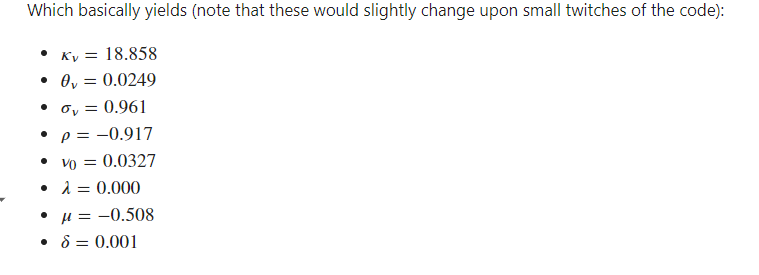

Market vs. Model prices in full calibration

In [64]:
def plot_full_calibration_results(p0):
    options["Model"] = B96_calculate_model_values(p0)
    plt.figure(figsize=(8, 6))
    plt.subplot(211)
    plt.grid()
    plt.title("Maturity %s" % str(options["Maturity"].iloc[0])[:10])
    plt.ylabel("option values")
    plt.plot(options.Strike, options.Call, "b", label="market")
    plt.plot(options.Strike, options.Model, "ro", label="model")
    plt.legend(loc=0)
    plt.axis(
        [
            min(options.Strike) - 10,
            max(options.Strike) + 10,
            min(options.Call) - 10,
            max(options.Call) + 10,
        ]
    )
    plt.subplot(212)
    plt.grid()
    wi = 5.0
    diffs = options.Model.values - options.Call.values
    plt.bar(options.Strike.values - wi / 2, diffs, width=wi)
    plt.ylabel("difference")
    plt.axis(
        [
            min(options.Strike) - 10,
            max(options.Strike) + 10,
            min(diffs) * 1.1,
            max(diffs) * 1.1,
        ]
    )
    plt.tight_layout()

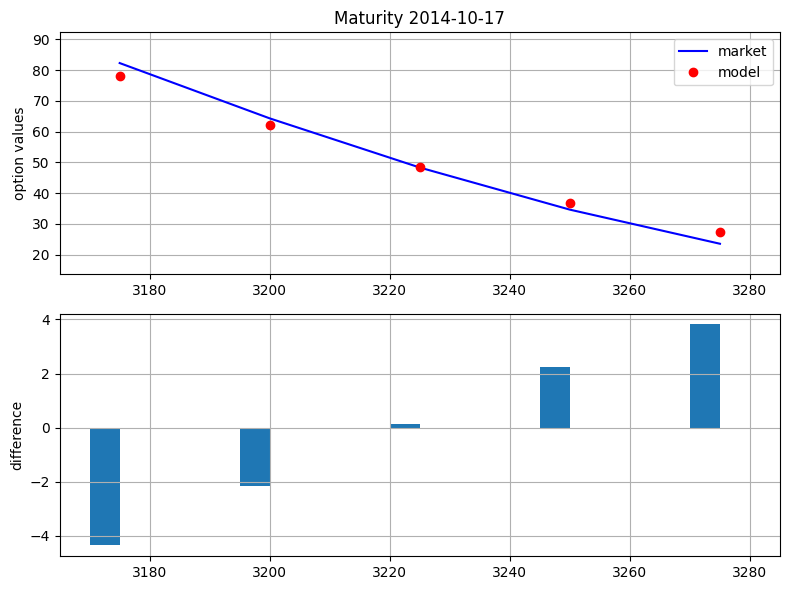

In [65]:
plot_full_calibration_results(full_params)

Practise

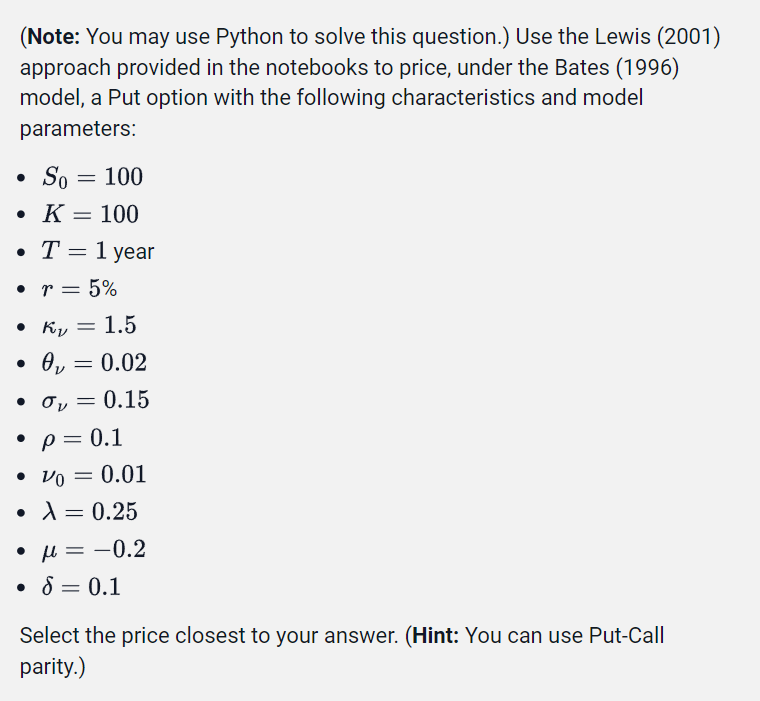

In [ ]:
|